Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the dataset

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Here, SibSp indicates the number of siblings or spouses onboard and Parch indicates the number of parents/children onboard.

#### Exploratory data analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First, checking the missing data.

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

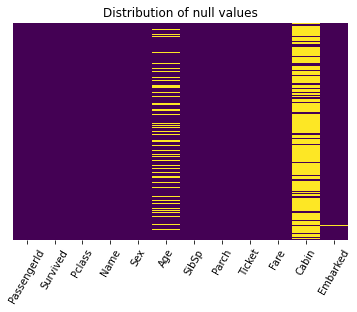

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xticks(rotation=60)
plt.title("Distribution of null values")
plt.show()

Next, we check if the values are missing at random samples or intervals in a variable/column.

In [7]:
import missingno as ms

In [8]:
#ms.bar(train)
#plt.title("Missing Values")

Text(0.5, 1.0, 'Missing Number Correlation Plot')

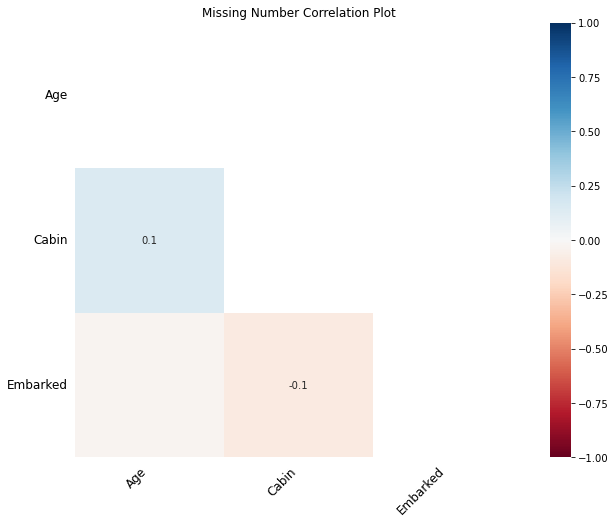

In [9]:
ms.heatmap(train, figsize=(10,8), fontsize=12)
plt.title("Missing Number Correlation Plot")

The above plot illustrates the correlation between missing values in the data. The missing values of 'Cabin' shows a positive correlation with missing values of 'Age', while the missing values of 'Embarked' shows a negative correlation with the missing values of 'Cabin'.

Checking the skewness of the data.

In [10]:
train['Age'].skew()

0.38910778230082704

In [11]:
train['Age'].mean()

29.69911764705882

In [12]:
train['Age'].median()

28.0

Since Mean > Median for 'Age', the data is right-skewed with a skewness of 0.38. 

C:\Users\debbar\Anaconda3\envs\projects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot for Age')

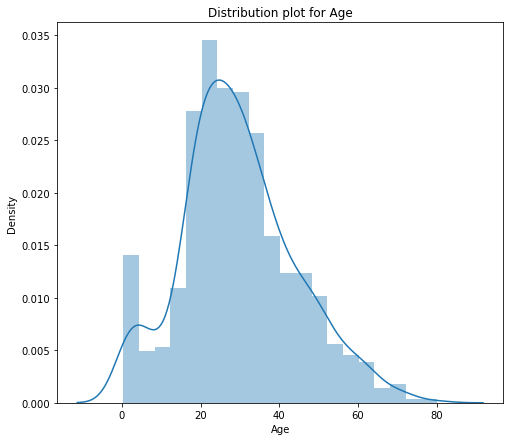

In [13]:
plt.figure(figsize=(8,7))
sns.distplot(train['Age'])
plt.title("Distribution plot for Age")

The distribution plot shows an almost normal distribution, however it may not paint the correct picture. Since sns.distplot() does not allow us to break the data down by categories, we create a violin plot using catplot.

Text(0.5, 1.0, 'Distribution plot for Age')

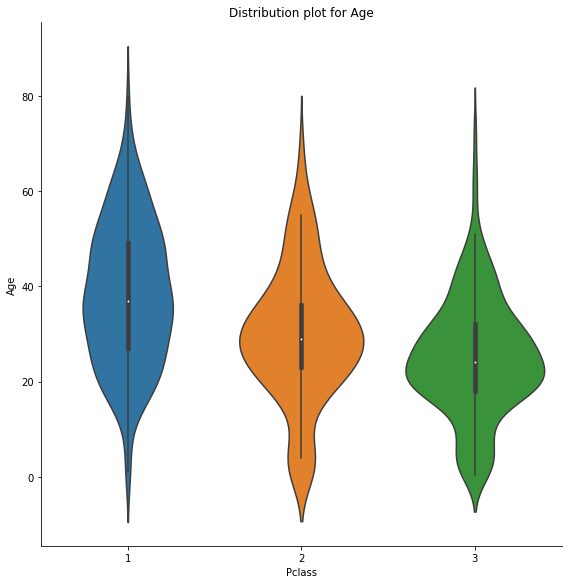

In [14]:
sns.catplot(y='Age', x='Pclass', kind='violin', data=train, height=8)
plt.title("Distribution plot for Age")

In [15]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
#plt.figure(figsize=(12,8))
#sns.boxplot(x='Age', data=train, showmeans=True)
#plt.title("Boxplot for Age")
#plt.show()

Next, checking the count of survival of passengers.

In [17]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

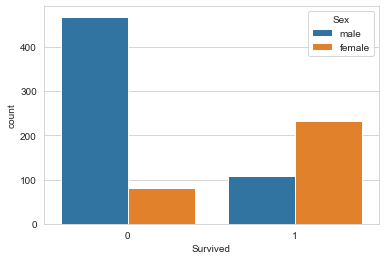

In [18]:
sns.countplot(x='Survived', hue='Sex', data=train)

This shows that around 550 passengers did not survive and around 350 passengers survived. Besides, there is a trend that the passengers who did not survive were much more likely to be male and those that did survive were almost about twice as likely to be female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

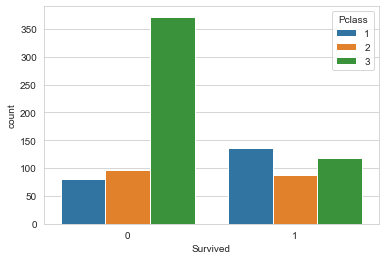

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=train)

This shows that the people who did not survive were mostly from the third class or the lowest class that was the cheapest to get onto. and the people who survived tend to be from the higher classes.

C:\Users\debbar\Anaconda3\envs\projects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

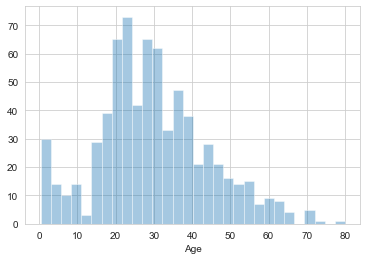

In [20]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

The distribution of passengers is skewed towards the younger ones, and the older ones have less representation onboard.

In [21]:
#age_groups = train.groupby(["Age"], as_index=False)["Survived"].apply(lambda x:x.count()==1)
age_groups = train.groupby(["Age"], as_index=False)["Survived"].sum()

age_groups

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,0
84,70.50,0
85,71.00,0
86,74.00,0


In [22]:
#plt.pie(h['Survived'], labels=age_groups['Age'], autopct='%1.1f%%', shadow=True) # only explode the largest slice
#plt.title('Age distribution of passengers', fontsize=15)
#plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

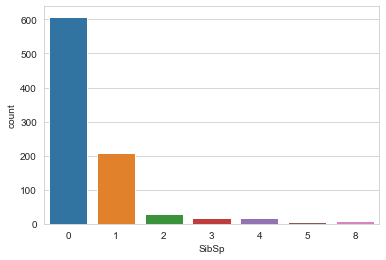

In [23]:
sns.countplot(x='SibSp', data=train)

This shows that most people did not have children or a spouse onboard. Probability of those are the men in the third class. And the second most populous seems to be the couples onboard.

<AxesSubplot:>

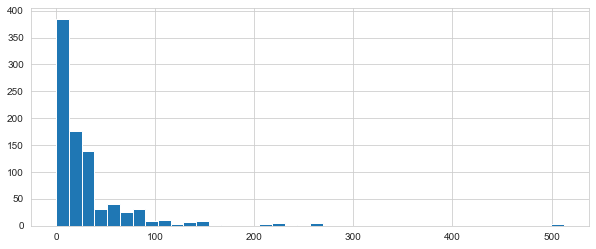

In [24]:
train['Fare'].hist(bins=40, figsize=(10,4))

This shows the distribution of fares towards the cheaper fare tickets as also seen that most passengers are actually in the cheaper third class.

Now, filling the missing data for the age column, using the average age per passenger class.

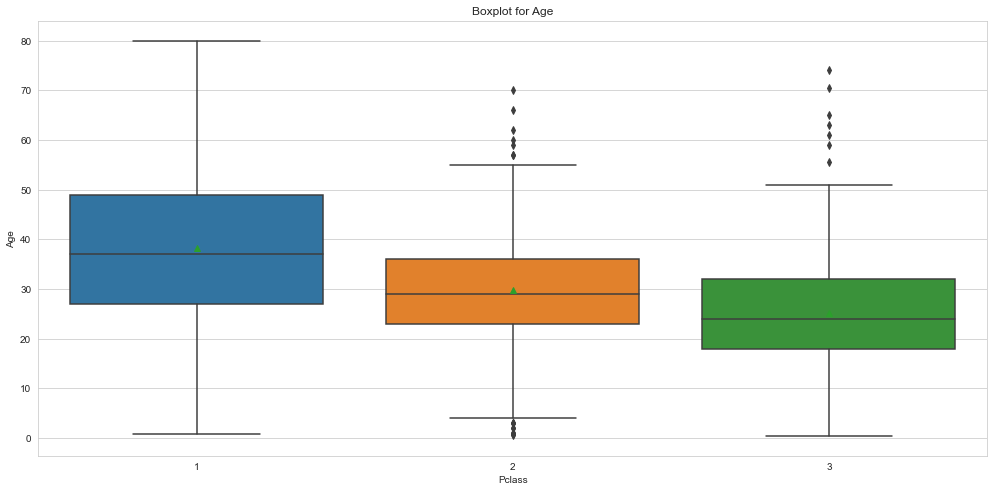

In [25]:
plt.figure(figsize=(17,8))
sns.boxplot(y='Age',x='Pclass',data=train,showmeans=True)
plt.title("Boxplot for Age")
plt.show()

This shows that the passengers in the first and second classes tend to be a bit older than the passengers in the third class.
We use these average age values in order to impute the age based off of the passenger class.

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

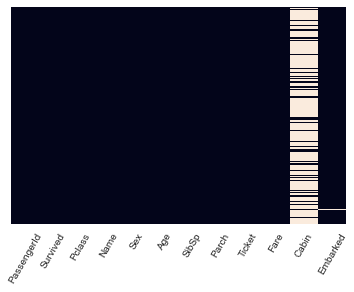

In [28]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.xticks(rotation=60)
plt.show()

Thus, we have no longer any missing information for the Age column.

Next, dropping the cabin column, since there is too much of missing values.

In [29]:
train.drop('Cabin', axis=1, inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
train.dropna(inplace=True)

<AxesSubplot:>

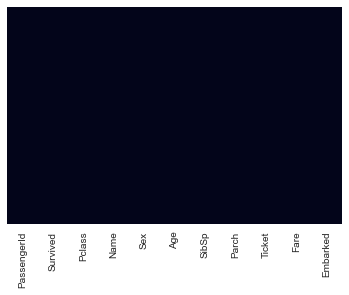

In [32]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

which shows now that there are no missing data.

Next to implement ML algorithm, we need to convert the categorical variables into dummy or indicator variables.

In [33]:
gender = pd.get_dummies(train['Sex'], drop_first=True)

In [34]:
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [35]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [36]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [37]:
train = pd.concat([train, gender, embark], axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [38]:
train.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
train.tail(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


The PassengerId column has the same value as index, so we can drop the column.

In [41]:
train.drop('PassengerId', axis=1, inplace=True)

In [42]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


Next, we are going to train and use the model to predict the classes of whether or not a passenger survived on the Titanic.

In [43]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Creating a logistic regression model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression()

In [48]:
logmodel.fit(X_train, y_train)

C:\Users\debbar\Anaconda3\envs\projects\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

#### Conclusion

The above model shows an accuracy of 82% for predicting the survival rate, while 83% for the drowned passengers of the Titanic.